In [2]:
                   #Initial Definitions, uploading the data, and cleaning up the data
    
import tensorflow as tf
import numpy as np
import time
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


                                            #Upload data
    
#init_notebook_mode(connected=True)
data_path='CRSP_1982-2012.csv'
data_path1='Compustat_1982-2012.csv'
data_CRSP=pd.read_csv(data_path)
data_Compustat=pd.read_csv(data_path1)

                    #Renaming to making data in these colums accessible to df.column_name
    
data_CRSP = data_CRSP.rename(columns={'Names Date': 'Date', 'CUSIP Header': 'CUSIP', 'Ticker Symbol':'Ticker','Price or Bid/Ask Average': 'Price'})
data_Compustat = data_Compustat.rename(columns={'Data Date':'Date','Ticker Symbol':'Ticker'})
data_CRSP=data_CRSP.rename(columns={'Global Company Key':'GCK','Price or Bid/Ask Average':'Price'})


                           #Merge compustat and crsp data into single dataframe
    
data_CRSP.CUSIP=pd.to_numeric(data_CRSP.CUSIP, errors='ignore')
data_Compustat.CUSIP=pd.to_numeric(data_Compustat.CUSIP, errors='ignore')
data_Compustat['CUSIP'] = data_Compustat['CUSIP'].str[:-1]
data_CRSP.Date=pd.to_numeric(data_CRSP.Date, errors='ignore')
data_Compustat.Date=pd.to_numeric(data_Compustat.Date, errors='ignore')
data_CRSP['Date'] = data_CRSP['Date'].astype(str).str[:-2]
data_Compustat['Date'] = data_Compustat['Date'].astype(str).str[:-2]
df = pd.merge(data_Compustat, data_CRSP, on=['Date','CUSIP'], how='inner')
df=df.rename(columns={'Global Company Key':'GCK','Price or Bid/Ask Average':'Price'})
len(df.GCK.unique())
df=df.rename(columns={'Standard Industrial Classification Code':'SICC'})

                                #These are the features of interest chosen 
features = [
 'Current Assets - Other - Total',
 'Assets - Other - Total',
 'Account Payable/Creditors - Trade',
 'Assets - Total',
 'Common/Ordinary Equity - Total',
 'Cash and Short-Term Investments',
 'Long-Term Debt - Total',
 'Discontinued Operations',
 'Dividends - Preferred/Preference',
 'Income Before Extraordinary Items - Adjusted for Common Stock Equivalents',
 'Income Before Extraordinary Items - Available for Common',
 'Income Before Extraordinary Items',
 'Invested Capital - Total - Quarterly',
 'Current Liabilities - Other - Total',
 'Liabilities - Other',
 'Liabilities - Total',
 'Net Income (Loss)',
 'Non-Operating Income (Expense) - Total',
 'Pretax Income',
 'Property Plant and Equipment - Total (Net)',
 'Preferred/Preference Stock (Capital) - Total',
 'Preferred/Preference Stock - Redeemable',
 'Sales/Turnover (Net)',
 'Stockholders Equity > Parent > Index Fundamental > Quarterly',
 'Stockholders Equity - Total',
 'Income Taxes - Total',
 'Extraordinary Items and Discontinued Operations',
 'Cash Dividends',
]

IncomeCashFlowFeatures = [
 'Dividends - Preferred/Preference',
 'Cash and Short-Term Investments',
 'Sales/Turnover (Net)',
 'Net Income (Loss)',
 'Income Before Extraordinary Items - Adjusted for Common Stock Equivalents',
 'Income Before Extraordinary Items - Available for Common',
 'Income Before Extraordinary Items',
 'Pretax Income',
 'Cash Dividends',
 'Income Taxes - Total',
 'Extraordinary Items and Discontinued Operations',
 'Non-Operating Income (Expense) - Total',
]

OtherFeatures = [
 'Current Assets - Other - Total',
 'Assets - Other - Total',
 'Account Payable/Creditors - Trade',
 'Assets - Total',
 'Common/Ordinary Equity - Total',
 'Long-Term Debt - Total',
 'Discontinued Operations',
 'Invested Capital - Total - Quarterly',
 'Current Liabilities - Other - Total',
 'Liabilities - Other',
 'Liabilities - Total',
 'Property Plant and Equipment - Total (Net)',
 'Preferred/Preference Stock (Capital) - Total',
 'Preferred/Preference Stock - Redeemable',
 'Stockholders Equity > Parent > Index Fundamental > Quarterly',
 'Stockholders Equity - Total'    
]

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)



C:\Users\Teddy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
                                              #PCA

#Dataframe with all target features scaled
#scaler = MinMaxScaler()
#imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
#df.loc[:, features]=imputer.fit_transform(df.loc[:, features])
#df.loc[:, features] = scaler.fit_transform(df.loc[:, features])

# Separating out the features
X = df.loc[:, features].values

# Separating out the target
Y = df.loc[:,['Price']].values


#Scaling the values
X=np.nan_to_num(X)
#np.savetxt('test.out', X, delimiter=',')
#X = scale(X)

#Latent variable
#transformer = FactorAnalysis(n_components=28, random_state=0)
#X_transformed = transformer.fit_transform(X)

#Perform a PCA 
pca = PCA(n_components=23)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

var1
plt.plot(var1)
plt.show()

SyntaxError: invalid syntax (<ipython-input-12-36e989f63b7f>, line 8)

In [3]:
#Machine Learning Models
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsRegressor
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC
from sklearn.ensemble               import RandomForestRegressor
from sklearn.neural_network         import MLPClassifier
from sklearn.neural_network         import MLPRegressor
from sklearn                        import linear_model
from sklearn.svm                    import LinearSVR
from tpot                           import TPOTRegressor

#Machine Learning Tools
from sklearn.model_selection        import train_test_split
from sklearn.preprocessing          import scale
from sklearn.preprocessing          import StandardScaler
from sklearn.preprocessing          import MinMaxScaler
from sklearn.decomposition          import FactorAnalysis
from sklearn.preprocessing          import Imputer
from sklearn.decomposition          import PCA

In [14]:
from tpot import TPOTRegressor

'198703'

In [67]:
X = df_now[1].loc[:, features]   #Extract feature variable data
X = X.fillna(X.mean())
#X = scalar.fit_transform(X_tempscaled)
#X = np.nan_to_num(X)
Y = df_now[1].loc[:,['Price']].values   #Extract target data
Y = Y.astype('float')
#inds = [item for sublist in np.argwhere(np.isnan(Y.values)[:,0]) for item in sublist]  #indices of nan for Y
#X_train, X_test = train_test_split(df, test_size=0.2)
#X=X.drop(X.index[inds])
#Y=Y.drop(Y.index[inds])

model = MLPRegressor(hidden_layer_sizes=(3, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.fit(list(X.values), Y)    #Fit the data using model
pp=model.predict(X)
perc_dif=(pp-Y.flatten())/abs(Y.flatten())    #Calculate the percent deviation of real value from predicted value
df_temp1=pd.DataFrame(pp)
df_temp1.columns=['Predicted Value']
df_temp2=pd.DataFrame(perc_dif)
df_temp2.columns=['Percentage Deviation']
df_model=pd.concat([df_temp1, df_temp2], axis=1)  


C:\Users\Teddy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Teddy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
# creates a dictionary of stocks deemed to be under and overvalued and retrieves all further monthly data available from the CRSP dataset
#def AgnosticTrackAll(model):

def Agnostic1M(model):

    df_now = {}     #Stores all data entries for the specific month currently iterated over 
    returns={}      #Holds individual monthly returns for all stocks through 1987-2011
    returns_1 = {}  #Overvalued stock returns
    returns_2 = {}  #2nd quintile...
    returns_3 = {}
    returns_4 = {}
    returns_5 = {}
    portfolio = {}  #Undervalued stock returns
    
    winning_pipes = []
    
    qrtrs=df.Date.unique()      #Find all the unique quarter dates to be used in filtering data
    
    qrtrs.sort()

    start = time.time()
    m=0

    for i in range(62,65):
        print(i)
        if m>0:        
            df_now[0]=df_now[1]              #df_now is a 2d dictionary holding the 2 current dataframes of interest
            
                                        #defining the dataframe for this month
                
        df_last_qrtr=pd.DataFrame()
        df_t=data_CRSP[data_CRSP['Date']== qrtrs[i]]     
        cus_list=list(df_t['CUSIP'])
        #len(cus_list)
        for cus in cus_list:
            df_te=data_Compustat[data_Compustat['CUSIP']== cus]
            df_last_qrtr=df_last_qrtr.append(df_te[df_te['Date']==qrtrs[i]].append(df_te[df_te['Date']==qrtrs[i-1]]).append(df_te[df_te['Date']==qrtrs[i-2]]))
            
        x1=[]
        for row in df_last_qrtr.index: 
            x1.append(row)
  
        df_temp=pd.DataFrame()
        for j in x1:
            x3=data_Compustat.loc[j-3:j][IncomeCashFlowFeatures].sum()
            x3['Date']=qrtrs[i]
            x3['CUSIP']=data_Compustat.loc[j]['CUSIP']
            x4=data_Compustat.loc[j][OtherFeatures]
            x5=pd.concat([x3,x4])
            df_temp=df_temp.append(pd.DataFrame(x5).T)

        df_te=df_t[['CUSIP','Price']]
        df_now[1]=pd.merge(df_temp, df_te, on=['CUSIP'], how="inner")
        df_now[1]=df_now[1].drop_duplicates(subset='CUSIP', keep='first')          #dataframe for this month
        
                                 #Calculate returns from last month's portfolio
            
        ret_1=[]
        if m>3:
            for j in range(0,len(portfolio[1])):
                if portfolio[1][j] in list(df_now[1]['CUSIP']):
                    or_pr = float(list(df_now[0][df_now[0]['CUSIP']== portfolio[1][j]]['Price'])[0])
                    new_pr = float(list(df_now[1][df_now[1]['CUSIP']== portfolio[1][j]]['Price'])[0])
                    per_ret = (new_pr-or_pr)/or_pr 
                    ret_1.append(per_ret)
            returns_1[m]=ret_1
            
        ret_2=[]
        if m>3:
            for j in range(0,len(portfolio[2])):
                if portfolio[2][j] in list(df_now[1]['CUSIP']):
                    or_pr = float(list(df_now[0][df_now[0]['CUSIP']== portfolio[2][j]]['Price'])[0])
                    new_pr = float(list(df_now[1][df_now[1]['CUSIP']== portfolio[2][j]]['Price'])[0])
                    per_ret = (new_pr-or_pr)/or_pr 
                    ret_2.append(per_ret)
            returns_2[m]=ret_2
            
        ret_3=[]
        if m>3:
            for j in range(0,len(portfolio[3])):
                if portfolio[3][j] in list(df_now[1]['CUSIP']):
                    or_pr = float(list(df_now[0][df_now[0]['CUSIP']== portfolio[3][j]]['Price'])[0])
                    new_pr = float(list(df_now[1][df_now[1]['CUSIP']== portfolio[3][j]]['Price'])[0])
                    per_ret = (new_pr-or_pr)/or_pr 
                    ret_3.append(per_ret)
            returns_3[m]=ret_3
            
        ret_4=[]
        if m>3:
            for j in range(0,len(portfolio[4])):
                if portfolio[4][j] in list(df_now[1]['CUSIP']):
                    or_pr = float(list(df_now[0][df_now[0]['CUSIP']== portfolio[4][j]]['Price'])[0])
                    new_pr = float(list(df_now[1][df_now[1]['CUSIP']== portfolio[4][j]]['Price'])[0])
                    per_ret = (new_pr-or_pr)/or_pr 
                    ret_4.append(per_ret)
            returns_4[m]=ret_4

        ret_5=[]
        if m>3:
            for j in range(0,len(portfolio[5])):
                if portfolio[5][j] in list(df_now[1]['CUSIP']):
                    or_pr = float(list(df_now[0][df_now[0]['CUSIP']== portfolio[5][j]]['Price'])[0])
                    new_pr = float(list(df_now[1][df_now[1]['CUSIP']== portfolio[5][j]]['Price'])[0])
                    per_ret = (new_pr-or_pr)/or_pr 
                    ret_5.append(per_ret)
            returns_5[m]=ret_5
        
                    #Run Model to sort the stock's into quintiles based off of mispricing
        
        X = df_now[1].loc[:, features]   #Extract feature variable data
        X = X.fillna(X.mean())
        #X = scalar.fit_transform(X_tempscaled)
        #X = np.nan_to_num(X)
        Y = df_now[1].loc[:,['Price']].values   #Extract target data
        Y = Y.astype('float').ravel()
        #inds = [item for sublist in np.argwhere(np.isnan(Y.values)[:,0]) for item in sublist]  #indices of nan for Y
        #X_train, X_test = train_test_split(df, test_size=0.2)
        #X=X.drop(X.index[inds])
        #Y=Y.drop(Y.index[inds])
        
        #TPOT testing
        start_time = time.time()
        model.fit(X, Y)
        elapsed = time.time() - start_time
        print(elapsed)
        #winning_pipes = winning_pipes.append(tpot.fitted_pipeline_)
        #print(tpot.score(X, Y))
        
        #model = MLPRegressor(hidden_layer_sizes=(15, ), activation='relu', solver='adam', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
        
        #model.fit(X, Y)    #Fit the data using model
        pp=model.predict(X)
        perc_dif=(pp-Y.flatten())/abs(Y.flatten())    #Calculate the percent deviation of real value from predicted value
        df_temp1=pd.DataFrame(pp)
        df_temp1.columns=['Predicted Value']
        df_temp2=pd.DataFrame(perc_dif)
        df_temp2.columns=['Percentage Deviation']
        df_model=pd.concat([df_temp1, df_temp2], axis=1) 

        result = pd.concat([df_now[1][['CUSIP','Price']].reset_index(), df_model], axis=1)  #Stores Cusip number of stock with its percent deviation, predicted price and real price in dataframe

        srted=result.sort_values(by=['Percentage Deviation'])    #Sorted verion of result
        q=round(len(srted)/5)
        
                                            #Update the portfolio
       
        portfolio[1] = list(srted['CUSIP'][:q])
        portfolio[2] = list(srted['CUSIP'][q:2*q])
        portfolio[3] = list(srted['CUSIP'][2*q:3*q])
        portfolio[4] = list(srted['CUSIP'][3*q:4*q])
        if 5*q>len(srted):
            portfolio[5] = list(srted['CUSIP'][4*q:])
        portfolio[5] = list(srted['CUSIP'][4*q:5*q])
        
        #portfolio_1[k] = srted['CUSIP'][:q]
        #portfolio_con_3M[m] = list(srted['CUSIP'])

            #The data for this time period has processed to find under-and-overvalued stocks so we must add the to our porfolio
            #as well as look at the returns gained from stocks priorly held.  I will also do a control that tracks an even distribution investment

        m+=1
    dt=qrtrs[i]
    returns[1]=returns_1
    returns[2]=returns_2
    returns[3]=returns_3
    returns[4]=returns_4
    returns[5]=returns_5
    
    end = time.time()
    print(end-start)
    
    return returns

In [23]:
tpot.score()

AttributeError: module 'tpot' has no attribute 'score'

In [25]:
                  # Run the models to get returns (takes 14-24 hrs depending on CPU used)

returns_tpot = Agnostic1M(TPOTRegressor(generations=5,verbosity=2))
#returns_LNSVR = Agnostic1M(LinearSVR(random_state=0, tol=1e-5))
#returns_KN = Agnostic1M(KNeighborsRegressor(n_neighbors=10)) 
#returns_KN = Agnostic1M()
#returns_MLP = Agnostic1M(MLPRegressor())
#returns_LR = Agnostic1M(linear_model.LinearRegression())
#returns_TS = Agnostic1M(linear_model.TheilSenRegressor())
#returns_SVR = Agnostic1M(svm.SVR())
#returns_ARD = Agnostic1M(linear_model.ARDRegression())
#returns_RF = Agnostic1M(RandomForestRegressor(n_estimators=100))

62


Generation 1 - Current best internal CV score: -284.07847851141156
Generation 2 - Current best internal CV score: -284.07847851141156
Generation 3 - Current best internal CV score: -284.07847851141156
Generation 4 - Current best internal CV score: -283.4978948245231
Generation 5 - Current best internal CV score: -283.4978948245231

Best pipeline: ExtraTreesRegressor(Normalizer(input_matrix, norm=l2), bootstrap=False, max_features=0.8, min_samples_leaf=8, min_samples_split=7, n_estimators=100)
1595.3671798706055
63


Generation 1 - Current best internal CV score: -280.16725227647913
Generation 2 - Current best internal CV score: -280.16725227647913
Generation 3 - Current best internal CV score: -280.0894226786206
Generation 4 - Current best internal CV score: -277.5359885978862
Generation 5 - Current best internal CV score: -277.5359885978862

Best pipeline: RandomForestRegressor(SelectPercentile(input_matrix, percentile=96), bootstrap=True, max_features=0.8500000000000001, min_samples_leaf=6, min_samples_split=18, n_estimators=100)
1607.4491419792175
64


Generation 1 - Current best internal CV score: -276.2637477898892
Generation 2 - Current best internal CV score: -276.2637477898892
Generation 3 - Current best internal CV score: -274.77485541491495
Generation 4 - Current best internal CV score: -274.77485541491495
Generation 5 - Current best internal CV score: -273.0151043795386

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.8500000000000001, min_samples_leaf=10, min_samples_split=4, n_estimators=100)
1669.557059288025
5283.264775276184


In [6]:
                   #Save the models so if kernal dies, don't need to re-run
#save_obj(returns_MLP,'returns_MLP')
#save_obj(returns_KN, 'returns_KN' )    
save_obj(returns_LR, 'returns_LR' )
#save_obj(returns_TS, 'returns_TS' )
#save_obj(returns_SVR, 'returns_SVR' )
#save_obj(returns_ARD, 'returns_ARD' )
#save_obj(returns_RF, 'returns_RF' )
#save_obj(returns_ag, 'returns_ag' )

In [23]:
returns_MLP=load_obj('returns_NN')


FileNotFoundError: [Errno 2] No such file or directory: 'obj/returns_NN.pkl'

In [3]:
                                   #Load returns if necessary
    
returns_LAS = load_obj('returns_LAS')
returns_RID = load_obj('returns_RID')
returns_LR_PCA = load_obj('returns_LR_PCA')
returns_ARD_PCA = load_obj('returns_ARD_PCA')
returns_LR_scaled = load_obj('returns_LR_scaled' )
returns_MLP = load_obj('returns_MLP')
returns_KN = load_obj('returns_KN' )   
returns_LR = load_obj("returns_LR")
returns_TS = load_obj("returns_TS")
returns_SVR = load_obj("returns_SVR")
returns_ARD = load_obj("returns_ARD")
returns_RF = load_obj("returns_RF")
returns_ag = load_obj("returns_ag")

In [5]:
 #Function to calculate the net return at each new month of 1 dollar invested in the first month over the sample time
    
def TotalReturns1M(returns):
    total_ret_0=[1]  #0: Control
    total_ret_1=[1]  # Overvalued
    total_ret_2=[1]
    total_ret_3=[1]
    total_ret_4=[1]
    total_ret_5=[1]  # Undervalued
    avg_ret_0=[1]
    avg_ret_1=[1]
    avg_ret_2=[1]
    avg_ret_3=[1]
    avg_ret_4=[1]
    avg_ret_5=[1]
    #total_ret_con=[1,1,1]
    #total_ret_con=[returns_con[4]/5]
    tot=0
    i=4
    for j in range(1,len(returns[1])):
        avg_ret_1.append(1 + np.sum(returns[1][i])/(len(returns[1][i])))
        total_ret_1.append(avg_ret_1[j]*total_ret_1[j-1])
        avg_ret_2.append(1+np.sum(returns[2][i])/(len(returns[2][i])))
        total_ret_2.append(avg_ret_2[j]*total_ret_2[j-1])
        avg_ret_3.append(1+np.sum(returns[3][i])/(len(returns[3][i])))
        total_ret_3.append(avg_ret_3[j]*total_ret_3[j-1])
        avg_ret_4.append(1+np.sum(returns[4][i])/(len(returns[4][i])))
        total_ret_4.append(avg_ret_4[j]*total_ret_4[j-1])
        avg_ret_5.append(1+np.sum(returns[5][i])/(len(returns[5][i])))
        total_ret_5.append(avg_ret_5[j]*total_ret_5[j-1])
        avg_ret_0.append((avg_ret_1[j] + avg_ret_2[j] + avg_ret_3[j] + avg_ret_4[j] + avg_ret_5[j])/5)
        total_ret_0.append(avg_ret_0[j]*total_ret_0[j-1])
        i+=1
    total_ret={}
    total_ret[0]=total_ret_0
    total_ret[1]=total_ret_1
    total_ret[2]=total_ret_2
    total_ret[3]=total_ret_3
    total_ret[4]=total_ret_4
    total_ret[5]=total_ret_5
    avg_ret={}
    avg_ret[0]=avg_ret_0
    avg_ret[1]=avg_ret_1
    avg_ret[2]=avg_ret_2
    avg_ret[3]=avg_ret_3
    avg_ret[4]=avg_ret_4
    avg_ret[5]=avg_ret_5
    return total_ret, avg_ret

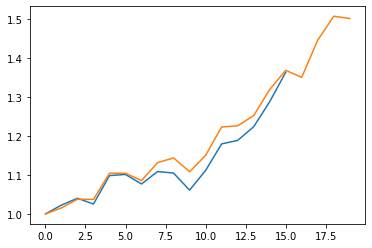

In [97]:
total_ret_NN, avg_ret_NN = TotalReturns1M(returns_NN)
total_ret_TS, avg_ret_TS = TotalReturns1M(returns_TS)
plt.plot(list(total_ret_NN[5]), label = 'NN')
plt.plot(list(total_ret_TS[5][0:20]), label = 'TS')

In [6]:
                                     #Get the net returns for the models
total_ret_LAS, avg_ret_LAS = TotalReturns1M(returns_LAS)
#total_ret_RID, avg_ret_RID = TotalReturns1M(returns_RID)
total_ret_LR_PCA, avg_ret_LR_PCA = TotalReturns1M(returns_LR_PCA) 
#total_ret_ARD_PCA, avg_ret_ARD_PCA = TotalReturns1M(returns_ARD_PCA) 
#total_ret_MLP, avg_ret_MLP = TotalReturns1M(returns_MLP) 
#total_ret_LR_scaled, avg_ret_LR_scaled = TotalReturns1M(returns_LR_scaled)
total_ret_KN, avg_ret_KN = TotalReturns1M(returns_KN)    
total_ret_LR, avg_ret_LR = TotalReturns1M(returns_LR)
total_ret_TS, avg_ret_TS = TotalReturns1M(returns_TS)
total_ret_SVR, avg_ret_SVR = TotalReturns1M(returns_SVR)
total_ret_ARD, avg_ret_ARD = TotalReturns1M(returns_ARD)
total_ret_RF, avg_ret_RF = TotalReturns1M(returns_RF)

Text(0, 0.5, 'Ratio to Starting Value')

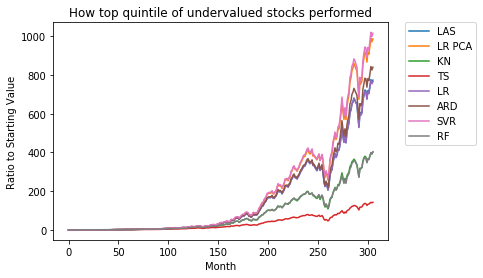

In [7]:
                            #Compare models performance through visualization
    
plt.plot(list(total_ret_LAS[5]), label = 'LAS')
#plt.plot(list(total_ret_RID[5]), label = 'RID')
#plt.plot(list(total_ret_LR_scaled[5]), label = 'LR scaled')
plt.plot(list(total_ret_LR_PCA[5]), label = 'LR PCA')
plt.plot(list(total_ret_KN[5]), label = 'KN')
plt.plot(list(total_ret_TS[5]), label = 'TS')
plt.plot(list(total_ret_LR[5]), label = 'LR')
plt.plot(list(total_ret_ARD[5]), label = 'ARD')
plt.plot(list(total_ret_SVR[5]), label = 'SVR')
plt.plot(list(total_ret_RF[5]), label = 'RF')
#plt.plot(list(total_ret_con[30:]), label = 'Control')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("How top quintile of undervalued stocks performed")
plt.xlabel('Month')
plt.ylabel('Ratio to Starting Value')

Text(0, 0.5, 'Ratio to Starting Value')

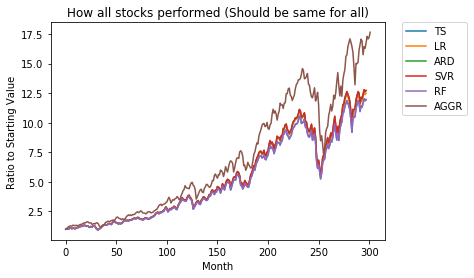

In [47]:
#Control (i.e. all stocks are included in evaluating net return so the model used to sort is irrelevant)- Should all be the same
plt.plot(list(total_ret_TS[0]), label = 'TS')
plt.plot(list(total_ret_LR[0]), label = 'LR')
plt.plot(list(total_ret_ARD[0]), label = 'ARD')
plt.plot(list(total_ret_SVR[0]), label = 'SVR')
plt.plot(list(total_ret_RF[0]), label = 'RF')
plt.plot(list(total_ret_ag), label = 'AGGR')
#plt.plot(list(total_ret_con[30:]), label = 'Control')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("How all stocks performed (Should be same for all)")
plt.xlabel('Month')
plt.ylabel('Ratio to Starting Value')

Text(0, 0.5, 'Ratio to Starting Value')

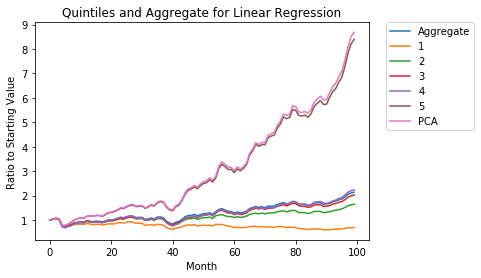

In [28]:
                                    #Plot of individual quintiles
plt.plot(list(total_ret_LR[0][:100]), label = 'Aggregate')
plt.plot(list(total_ret_LR[1][:100]), label = '1')
plt.plot(list(total_ret_LR[2][:100]), label = '2')
plt.plot(list(total_ret_LR[3][:100]), label = '3')
plt.plot(list(total_ret_LR[4][:100]), label = '4')
plt.plot(list(total_ret_LR[5][:100]), label = '5')
plt.plot(list(total_ret_LR_PCA[5][:100]), label = 'PCA')
#plt.plot(list(total_ret_ARD[5][:100]), label = 'ARD 5')
#plt.plot(list(total_ret_con[30:]), label = 'Control')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Quintiles and Aggregate for Linear Regression")
plt.xlabel('Month')
plt.ylabel('Ratio to Starting Value')

In [30]:
#Quantify the performance of the models in each quintile and control
models = [avg_ret_LR, avg_ret_TS, avg_ret_LR_PCA, avg_ret_SVR]

import inspect, re

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]
    
for j in models:
    print(namestr(j,globals()),':')
    for i in range(0,6):
        print(np.mean(j[i]))

['avg_ret_LR', 'j'] :
1.009181457978986
0.9978374885226233
1.0057780327407688
1.008243793351476
1.0104036355947386
1.023644339685323
['j', 'avg_ret_TS'] :
1.0090293069090945
1.0011349402766485
1.0043748551752405
1.0086167971640867
1.0133853922883103
1.0176345496411863
['j', 'avg_ret_LR_PCA'] :
1.0092219035143912
0.9974210729440264
1.0058752672165043
1.0082738528468331
1.0100923577812746
1.0244469667833174
['j', 'avg_ret_SVR'] :
1.009210226048733
0.9973503766482813
1.0060018610156625
1.0080995601353582
1.010071470499428
1.0245278619449352


In [20]:
def FractionAboveZero(returns):
    frac_0=[] #Control
    frac_1=[]
    frac_2=[]
    frac_3=[]
    frac_4=[]
    frac_5=[]
    #total_ret_con=[1,1,1]
    #total_ret_con=[returns_con[4]/5]
    tot=0
    i=4+215
    for j in range(1,len(returns[1])-215):
        count_1=0
        count_2=0
        count_3=0
        count_4=0
        count_5=0
        len1=len(returns[1][i])
        len2=len(returns[2][i])
        len3=len(returns[3][i])
        len4=len(returns[4][i])
        len5=len(returns[5][i])
        for k in range(len1):
            if returns[1][i][k]>0:
                count_1+=1
        for k in range(len2):
            if returns[2][i][k]>0:
                count_2+=1
        for k in range(len3):  
            if returns[3][i][k]>0:
                count_3+=1
        for k in range(len4):
            if returns[4][i][k]>0:
                count_4+=1
        for k in range(len5):
            if returns[5][i][k]>0:
                count_5+=1
        frac_1.append(count_1/len1)
        frac_2.append(count_1/len2)
        frac_3.append(count_1/len3)
        frac_4.append(count_1/len4)
        frac_5.append(count_1/len5)
        frac_0.append((count_1+count_2+count_3+count_4+count_5)/(len1+len2+len3+len4+len5))
        i+=1
        
    frac=[np.mean(frac_0),np.mean(frac_1),np.mean(frac_2),np.mean(frac_3),np.mean(frac_4),np.mean(frac_5)]
    return frac

In [32]:
FractionAboveZero(returns_LR)

[0.518907249737477,
 0.5255564699788101,
 0.5261978776667159,
 0.5280006407295919,
 0.5316009128880234,
 0.5500260645884512]

In [33]:
## Check Aggregate performance without using a model 
df_now = {}     #Stores all data entries from a specific time 
overvalued = {}     #Overvalued Stocks
undervalued = {}     #Undervalued Stocks
returns_ag={}
portfolio = {}
qrtrs=df.Date.unique()
qrtrs.sort()

total_ret_ag=[1]  #0: Control
avg_ret_ag=[1]

m=0
for i in range(70,len(qrtrs)):
    print(i)
    if m>0:
        df_now[0]=df_now[1]
   # print(time.time()-start)
    df_last_qrtr=pd.DataFrame()
    #df_now[m]=df_red[df_red['Date']== qrtrs[i]]
    df_t=data_CRSP[data_CRSP['Date']== qrtrs[i]]
    df_now[1]=df_t
    
    srted=df_t.sort_values(by=['Price'])    #Sorted verion of result  
    
    
    ret=[]
    if m>0:
        for j in range(0,len(portfolio)):
            if portfolio[j] in list(df_now[1]['CUSIP']):
                or_pr = float(list(df_now[0][df_now[0]['CUSIP']== portfolio[j]]['Price'])[0])
                new_pr = float(list(df_now[1][df_now[1]['CUSIP']== portfolio[j]]['Price'])[0])
                per_ret = (new_pr-or_pr)/or_pr 
                ret.append(per_ret)
        returns_ag[m]=ret
        
        avg_ret_ag.append(1 + np.sum(returns_ag[m])/(len(returns_ag[m])))
        total_ret_ag.append(avg_ret_ag[m]*total_ret_ag[m-1])
     
    portfolio = list(srted['CUSIP'])
        
    m+=1

70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
32

In [82]:
import multiprocessing

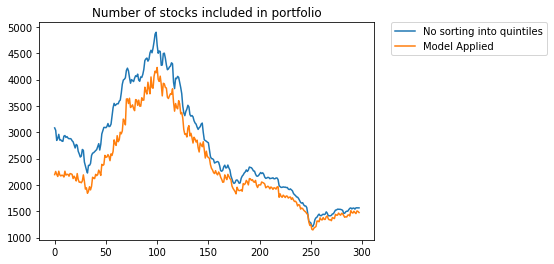

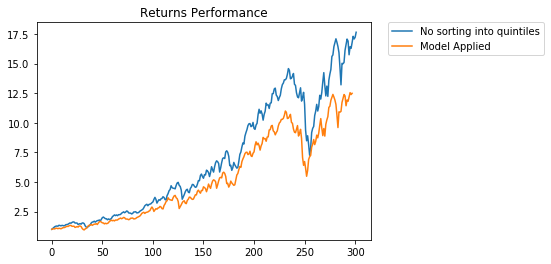

In [38]:
x1=[]
x2=[]
for i in range(4,4+len(returns_LR[5])):
    x1.append(5*len(returns_LR[1][i]))
    x2.append(len(returns_ag[i]))
plt.plot(x2,label='No sorting into quintiles')
plt.plot(x1,label='Model Applied')
plt.title('Number of stocks included in portfolio')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure()
plt.plot(total_ret_ag,label= 'No sorting into quintiles')
plt.plot(total_ret_LR[0],label='Model Applied')
plt.title('Returns Performance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

70
Train on 2267 samples
Epoch 1/100
2267/2267 [==============================] - 0s 128us/sample - loss: 606.4248 - mse: 606.4248
Epoch 2/100
2267/2267 [==============================] - 0s 49us/sample - loss: 603.4979 - mse: 603.4979
Epoch 3/100
2267/2267 [==============================] - 0s 50us/sample - loss: 603.3344 - mse: 603.3344
Epoch 4/100
2267/2267 [==============================] - 0s 50us/sample - loss: 603.2554 - mse: 603.2555
Epoch 5/100
2267/2267 [==============================] - 0s 49us/sample - loss: 603.2523 - mse: 603.2523
Epoch 6/100
2267/2267 [==============================] - 0s 51us/sample - loss: 603.2011 - mse: 603.2012
Epoch 7/100
2267/2267 [==============================] - 0s 51us/sample - loss: 603.2134 - mse: 603.2134
Epoch 8/100
2267/2267 [==============================] - 0s 50us/sample - loss: 603.1913 - mse: 603.1914
Epoch 9/100
2267/2267 [==============================] - 0s 49us/sample - loss: 603.1744 - mse: 603.1745
Epoch 10/100
2267/2267 [=====

ValueError: Length mismatch: Expected axis has 2267 elements, new values have 1 elements

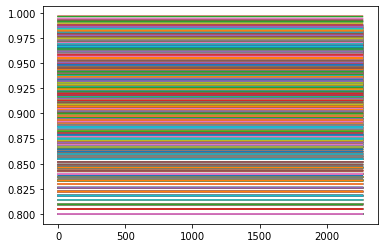

In [107]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

neural = tf.keras.models.Sequential([tf.keras.layers.Dense(23), 
                                    #tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])
neural.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

returns_NN = AgnosticNN(neural)



In [79]:
from multiprocessing import Pool

def process_image(name):
    sci=fits.open('{}.fits'.format(name))
    <process>

if __name__ == '__main__':
    pool = Pool()                         # Create a multiprocessing Pool
    pool.map(process_image, data_inputs)

False

70
Train on 2267 samples
Epoch 1/100
2267/2267 [==============================] - 0s 58us/sample - loss: 603.1560 - mse: 603.1561
Epoch 2/100
2267/2267 [==============================] - 0s 49us/sample - loss: 603.1559 - mse: 603.1559
Epoch 3/100
2267/2267 [==============================] - 0s 50us/sample - loss: 603.1558 - mse: 603.1560
Epoch 4/100
2267/2267 [==============================] - 0s 50us/sample - loss: 603.1558 - mse: 603.1560
Epoch 5/100
2267/2267 [==============================] - 0s 51us/sample - loss: 603.1558 - mse: 603.1560
Epoch 6/100
2267/2267 [==============================] - 0s 50us/sample - loss: 603.1558 - mse: 603.1558
Epoch 7/100
2267/2267 [==============================] - 0s 50us/sample - loss: 603.1561 - mse: 603.1561
Epoch 8/100
2267/2267 [==============================] - 0s 49us/sample - loss: 603.1562 - mse: 603.1562
Epoch 9/100
2267/2267 [==============================] - 0s 50us/sample - loss: 603.1558 - mse: 603.1558
Epoch 10/100
2267/2267 [======

ValueError: Length mismatch: Expected axis has 2267 elements, new values have 1 elements

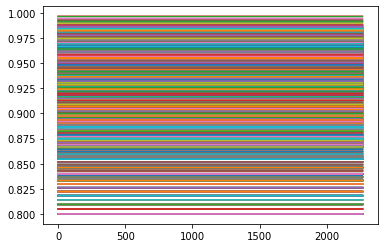

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1), copy=True)
import sklearn as sk
model=neural
#def AgnosticNN(model):

df_now = {}     #Stores all data entries from a specific time 
overvalued = {}     #Overvalued Stocks
undervalued = {}     #Undervalued Stocks
returns={}
returns_1 = {}
returns_2 = {}
returns_3 = {}
returns_4 = {}
returns_5 = {}
portfolio = {}
portfolio_1 = {}
portfolio_2 = {}
portfolio_3 = {}
portfolio_4 = {}
portfolio_5 = {}
df_so_far=pd.DataFrame()
#Find all the unique quarter dates to be used in filtering data
qrtrs=df.Date.unique()
qrtrs.sort()

start = time.time()
m=0

for i in range(70,len(qrtrs)):
    print(i)
    if m>0:
        df_now[0]=df_now[1]
   # print(time.time()-start)
    df_last_qrtr=pd.DataFrame()
    #df_now[m]=df_red[df_red['Date']== qrtrs[i]]
    df_t=data_CRSP[data_CRSP['Date']== qrtrs[i]]
    cus_list=list(df_t['CUSIP'])
    #len(cus_list)
    for cus in cus_list:
        df_te=data_Compustat[data_Compustat['CUSIP']== cus]
        df_last_qrtr=df_last_qrtr.append(df_te[df_te['Date']==qrtrs[i]].append(df_te[df_te['Date']==qrtrs[i-1]]).append(df_te[df_te['Date']==qrtrs[i-2]]))

    x1=[]
    for row in df_last_qrtr.index: 
        x1.append(row)
    #Create Safe-gaurd

    df_temp=pd.DataFrame()
    for j in x1:
        x3=data_Compustat.loc[j-3:j][IncomeCashFlowFeatures].sum()
        x3['Date']=qrtrs[i]
        x3['CUSIP']=data_Compustat.loc[j]['CUSIP']
        x4=data_Compustat.loc[j][OtherFeatures]
        x5=pd.concat([x3,x4])
        df_temp=df_temp.append(pd.DataFrame(x5).T)

    df_te=df_t[['CUSIP','Price']]
    df_now[1]=pd.merge(df_temp, df_te, on=['CUSIP'], how="inner")
    df_now[1]=df_now[1].drop_duplicates(subset='CUSIP', keep='first')
    #df_so_far=df_so_far.append(df_now[1])
    #df_so_far=df_so_far.reset_index()

    #Calculate returns from last month's portfolio
    ret_1=[]
    if m>3:
        for j in range(0,len(portfolio[1])):
            if portfolio[1][j] in list(df_now[1]['CUSIP']):
                or_pr = float(list(df_now[0][df_now[0]['CUSIP']== portfolio[1][j]]['Price'])[0])
                new_pr = float(list(df_now[1][df_now[1]['CUSIP']== portfolio[1][j]]['Price'])[0])
                per_ret = (new_pr-or_pr)/or_pr 
                ret_1.append(per_ret)
        returns_1[m]=ret_1

    ret_2=[]
    if m>3:
        for j in range(0,len(portfolio[2])):
            if portfolio[2][j] in list(df_now[1]['CUSIP']):
                or_pr = float(list(df_now[0][df_now[0]['CUSIP']== portfolio[2][j]]['Price'])[0])
                new_pr = float(list(df_now[1][df_now[1]['CUSIP']== portfolio[2][j]]['Price'])[0])
                per_ret = (new_pr-or_pr)/or_pr 
                ret_2.append(per_ret)
        returns_2[m]=ret_2

    ret_3=[]
    if m>3:
        for j in range(0,len(portfolio[3])):
            if portfolio[3][j] in list(df_now[1]['CUSIP']):
                or_pr = float(list(df_now[0][df_now[0]['CUSIP']== portfolio[3][j]]['Price'])[0])
                new_pr = float(list(df_now[1][df_now[1]['CUSIP']== portfolio[3][j]]['Price'])[0])
                per_ret = (new_pr-or_pr)/or_pr 
                ret_3.append(per_ret)
        returns_3[m]=ret_3

    ret_4=[]
    if m>3:
        for j in range(0,len(portfolio[4])):
            if portfolio[4][j] in list(df_now[1]['CUSIP']):
                or_pr = float(list(df_now[0][df_now[0]['CUSIP']== portfolio[4][j]]['Price'])[0])
                new_pr = float(list(df_now[1][df_now[1]['CUSIP']== portfolio[4][j]]['Price'])[0])
                per_ret = (new_pr-or_pr)/or_pr 
                ret_4.append(per_ret)
        returns_4[m]=ret_4

    # Undervalued Stocks
    ret_5=[]
    if m>3:
        for j in range(0,len(portfolio[5])):
            if portfolio[5][j] in list(df_now[1]['CUSIP']):
                or_pr = float(list(df_now[0][df_now[0]['CUSIP']== portfolio[5][j]]['Price'])[0])
                new_pr = float(list(df_now[1][df_now[1]['CUSIP']== portfolio[5][j]]['Price'])[0])
                per_ret = (new_pr-or_pr)/or_pr 
                ret_5.append(per_ret)
        returns_5[m]=ret_5

    #Run Model to sort the stock's into quintiles based off of mispricing

    X = df_now[1].loc[:, features]   #Extract feature variable data
    X = X.fillna(X.mean())
    X = scaler.fit_transform(X)
    X = np.nan_to_num(X)
    Y = df_now[1].loc[:,['Price']].values   #Extract target data
    #inds = [item for sublist in np.argwhere(np.isnan(Y.values)[:,0]) for item in sublist]  #indices of nan for Y
    #X=X.drop(X.index[inds])
    #Y=Y.drop(Y.index[inds])
    #X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X,Y,test_size=.33)


    model.fit(X, Y, epochs=100, batch_size = 32)    #Fit the data using model


    plt.plot((Y.flatten()-model.predict(X))/Y.flatten())


    pp=model.predict(X)
    perc_dif=(pp-Y.flatten())/abs(Y.flatten())    #Calculate the percent deviation of real value from predicted value
    df_temp1=pd.DataFrame(pp)
    df_temp1.columns=['Predicted Value']
    df_temp2=pd.DataFrame(perc_dif)
    df_temp2.columns=['Percentage Deviation']
    df_model=pd.concat([df_temp1, df_temp2], axis=1)   

    result = pd.concat([df_now[1][['CUSIP','Price']].reset_index(), df_model], axis=1)  #Stores Cusip number of stock with its percent deviation, predicted price and real price in dataframe

    srted=result.sort_values(by=['Percentage Deviation'])    #Sorted verion of result
    q=round(len(srted)/5)

    #Store the over/undervalued stocks into a dictionary
    #overvalued=pd.DataFrame(srted.head(q))    #pick off top quintile of stocks
    #undervalued=pd.DataFrame(srted.tail(q))   #pick off bottom quintile of stocks

    #Update the portfolio

    portfolio[1] = list(srted['CUSIP'][:q])
    portfolio[2] = list(srted['CUSIP'][q:2*q])
    portfolio[3] = list(srted['CUSIP'][2*q:3*q])
    portfolio[4] = list(srted['CUSIP'][3*q:4*q])
    portfolio[5] = list(srted['CUSIP'][4*q:])
    #portfolio_con_3M[m] = list(srted['CUSIP'])

        #The data for this time period has processed to find under-and-overvalued stocks so we must add the to our porfolio
        #as well as look at the returns gained from stocks priorly held.  I will also do a control that tracks an even distribution investment

    m+=1
dt=qrtrs[i]
returns[1]=returns_1
returns[2]=returns_2
returns[3]=returns_3
returns[4]=returns_4
returns[5]=returns_5

end = time.time()
print(end-start)
    
#    return returns

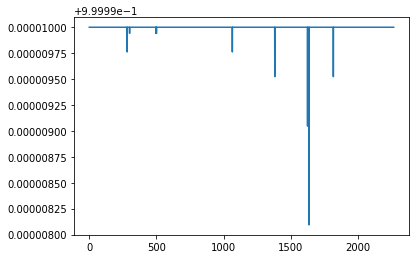

In [117]:
plt.plot(model.predict(X))

In [171]:
#Ideas for understanding why they work differently
#Itteratively omit columns from dataframe, pca, correlation function

# creates a dictionary of stocks deemed to be under and overvalued and retrieves all further monthly data available from the CRSP dataset
#def AgnosticTrackAll(model):

def AgnosticEdge(model1, model2):

    df_now = {}     #Stores all data entries for the specific month currently iterated over 
    returns={}      #Holds individual monthly returns for all stocks through 1987-2011
    returns_1 = {}  #Overvalued stock returns
    returns_2 = {}  #2nd quintile...
    returns_3 = {}
    returns_4 = {}
    returns_5 = {}
    portfolio_1 = {}  #Undervalued stock returns
    portfolio_2 = {}
    ARD_stocks = {}
    LR_stocks = {}
    ARD_df = {}
    LR_df = {}
    
    qrtrs=df.Date.unique()      #Find all the unique quarter dates to be used in filtering data
    
    qrtrs.sort()

    start = time.time()
    m=0

    for i in range(70,150):
        print(i)
                
        df_last_qrtr=pd.DataFrame()
        df_t=data_CRSP[data_CRSP['Date']== qrtrs[i]]     
        cus_list=list(df_t['CUSIP'])
        #len(cus_list)
        for cus in cus_list:
            df_te=data_Compustat[data_Compustat['CUSIP']== cus]
            df_last_qrtr=df_last_qrtr.append(df_te[df_te['Date']==qrtrs[i]].append(df_te[df_te['Date']==qrtrs[i-1]]).append(df_te[df_te['Date']==qrtrs[i-2]]))
            
        x1=[]
        for row in df_last_qrtr.index: 
            x1.append(row)
  
        df_temp=pd.DataFrame()
        for j in x1:
            x3=data_Compustat.loc[j-3:j][IncomeCashFlowFeatures].sum()
            x3['Date']=qrtrs[i]
            x3['CUSIP']=data_Compustat.loc[j]['CUSIP']
            x4=data_Compustat.loc[j][OtherFeatures]
            x5=pd.concat([x3,x4])
            df_temp=df_temp.append(pd.DataFrame(x5).T)

        df_te=df_t[['CUSIP','Price']]
        df_now=pd.merge(df_temp, df_te, on=['CUSIP'], how="inner")
        df_now=df_now.drop_duplicates(subset='CUSIP', keep='first')          #dataframe for this month
        
                    #Run Model to sort the stock's into quintiles based off of mispricing
        
        X = df_now.loc[:, features]   #Extract feature variable data
        X = X.fillna(X.mean())
        #X = scalar.fit_transform(X_tempscaled)
        #X = np.nan_to_num(X)
        Y = df_now.loc[:,['Price']].values   #Extract target data
        #Y = Y.astype('float').ravel()
        #inds = [item for sublist in np.argwhere(np.isnan(Y.values)[:,0]) for item in sublist]  #indices of nan for Y
        #X_train, X_test = train_test_split(df, test_size=0.2)
        #X=X.drop(X.index[inds])
        #Y=Y.drop(Y.index[inds])

        #model = MLPRegressor(hidden_layer_sizes=(15, ), activation='relu', solver='adam', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

        model1.fit(X, Y.ravel())    #Fit the data using model
        model2.fit(X, Y.ravel())    #Fit the data using model
        
        
        pp1=model1.predict(X)
        perc_dif1=(pp1-Y.flatten())/abs(Y.flatten())    #Calculate the percent deviation of real value from predicted value     
        df_temp1_1=pd.DataFrame(pp1)
        df_temp1_1.columns=['Predicted Value']
        df_temp2_1=pd.DataFrame(perc_dif1)
        df_temp2_1.columns=['Percentage Deviation']
        df_model_1=pd.concat([df_temp1_1, df_temp2_1], axis=1) 

        result1 = pd.concat([df_now[['CUSIP','Price']].reset_index(), df_model_1], axis=1)  #Stores Cusip number of stock with its percent deviation, predicted price and real price in dataframe

        srted_1=result1.sort_values(by=['Percentage Deviation'])    #Sorted verion of result
        q=round(len(srted_1)/5)
        
                                            #Update the portfolio
       
        portfolio_1[5] = list(srted_1['CUSIP'][4*q:5*q])
        
        pp2=model2.predict(X)
        perc_dif2=(pp2-Y.flatten())/abs(Y.flatten())
        df_temp1_2=pd.DataFrame(pp2)
        df_temp1_2.columns=['Predicted Value']
        df_temp2_2=pd.DataFrame(perc_dif2)
        df_temp2_2.columns=['Percentage Deviation']
        df_model_2=pd.concat([df_temp1_2, df_temp2_2], axis=1) 

        result2 = pd.concat([df_now[['CUSIP','Price']].reset_index(), df_model_2], axis=1)  #Stores Cusip number of stock with its percent deviation, predicted price and real price in dataframe

        srted_2=result2.sort_values(by=['Percentage Deviation'])    #Sorted verion of result
        
        portfolio_2[5] = list(srted_2['CUSIP'][4*q:5*q])
        
        ARD_stocks[i]=set(portfolio_1[5]) - set(portfolio_2[5])
        LR_stocks[i]=set(portfolio_2[5]) - set(portfolio_1[5])
        
        ARD_df[i] = pd.DataFrame()
        for s in ARD_stocks[i]:
            ARD_df[i] = ARD_df[i].append(df_now[df_now['CUSIP']== s])
        
        LR_df[i] = pd.DataFrame()
        for s in LR_stocks[i]:
            LR_df[i] = LR_df[i].append(df_now[df_now['CUSIP']== s])
        #portfolio_1[k] = srted['CUSIP'][:q]
        #portfolio_con_3M[m] = list(srted['CUSIP'])

            #The data for this time period has processed to find under-and-overvalued stocks so we must add the to our porfolio
            #as well as look at the returns gained from stocks priorly held.  I will also do a control that tracks an even distribution investment

        m+=1
    dt=qrtrs[i]
    returns[1]=returns_1
    returns[2]=returns_2
    returns[3]=returns_3
    returns[4]=returns_4
    returns[5]=returns_5
    
    end = time.time()
    print(end-start)
    
    return ARD_stocks,LR_stocks, ARD_df, LR_df

In [150]:
ARD_stock_1, LR_stock_1, ARD_df_1, LR_df_1 = AgnosticEdge(linear_model.ARDRegression(),linear_model.LinearRegression())

70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
17030.91722345352


In [140]:
qrtrs=df.Date.unique()      #Find all the unique quarter dates to be used in filtering data
i=70  
qrtrs.sort()
df_last_qrtr=pd.DataFrame()
df_t=data_CRSP[data_CRSP['Date']== qrtrs[i]]     
cus_list=list(df_t['CUSIP'])
#len(cus_list)
for cus in cus_list:
    df_te=data_Compustat[data_Compustat['CUSIP']== cus]
    df_last_qrtr=df_last_qrtr.append(df_te[df_te['Date']==qrtrs[i]].append(df_te[df_te['Date']==qrtrs[i-1]]).append(df_te[df_te['Date']==qrtrs[i-2]]))

x1=[]
for row in df_last_qrtr.index: 
    x1.append(row)

df_temp=pd.DataFrame()
for j in x1:
    x3=data_Compustat.loc[j-3:j][IncomeCashFlowFeatures].sum()
    x3['Date']=qrtrs[i]
    x3['CUSIP']=data_Compustat.loc[j]['CUSIP']
    x4=data_Compustat.loc[j][OtherFeatures]
    x5=pd.concat([x3,x4])
    df_temp=df_temp.append(pd.DataFrame(x5).T)

df_te=df_t[['CUSIP','Price']]
df_now=pd.merge(df_temp, df_te, on=['CUSIP'], how="inner")
df_now=df_now.drop_duplicates(subset='CUSIP', keep='first')          #dataframe for this month

In [139]:
ARD_stock_1


{70: {'00753T10',
  '15640L40',
  '19690210',
  '19841510',
  '21768710',
  '29364G10',
  '30231G10',
  '33616010',
  '37244710',
  '42868110',
  '45272210',
  '46047510',
  '55917720',
  '56169910',
  '5826410',
  '64287610',
  '66863410',
  '78989510',
  '89675540',
  '95943210'},
 71: {'19841510',
  '30231G10',
  '37006410',
  '3741110',
  '38991510',
  '45272210',
  '51280710',
  '52687210',
  '62845210',
  '6822110',
  '84722020',
  '85223510',
  '87082710',
  '92240M10',
  '97221810'},
 72: {'12589610',
  '12612L10',
  '13700310',
  '15640L40',
  '21768710',
  '30231G10',
  '3741110',
  '38991510',
  '45703010',
  '66863410',
  '78989510',
  '92240M10',
  '97221810',
  '98147510',
  '9985510'}}

In [152]:
save_obj(ARD_stock_1, 'ARD_stock_1')
save_obj(LR_stock_1, 'LR_stock_1')
save_obj(ARD_df_1, 'ARD_df_1')
save_obj(LR_df_1, 'LR_df_1')

ARD_stock_2= load_obj('ARD_stock_2')
LR_stock_2= load_obj('LR_stock_2')
ARD_df_2= load_obj('ARD_df_2')
LR_df_2= load_obj('LR_df_2')

ARD_stock_3= load_obj('ARD_stock_3')
LR_stock_3= load_obj('LR_stock_3')
ARD_df_3= load_obj('ARD_df_3')
LR_df_3= load_obj('LR_df_3')

ARD_stock_4= load_obj('ARD_stock_4')
LR_stock_4= load_obj('LR_stock_4')
ARD_df_4= load_obj('ARD_df_4')
LR_df_4= load_obj('LR_df_4')

In [170]:
ARD_stocks = ARD_stock_1
ARD_stocks.update(ARD_stock_2)
ARD_stocks.update(ARD_stock_3)
ARD_stocks.update(ARD_stock_4)

LR_stocks = LR_stock_1
LR_stocks.update(LR_stock_2)
LR_stocks.update(LR_stock_3)
LR_stocks.update(LR_stock_4)

LR_df = LR_df_1
LR_df.update(LR_df_2)
LR_df.update(LR_df_3)
LR_df.update(LR_df_4)

ARD_df = ARD_df_1
ARD_df.update(ARD_df_2)
ARD_df.update(ARD_df_3)
ARD_df.update(ARD_df_4)

In [14]:
x=0
for i in range(len(returns_ARD[1])):
    x+=len(returns_ARD[1][i+4])
for i in range(len(returns_ARD[2])):
    x+=len(returns_ARD[2][i+4])
for i in range(len(returns_ARD[3])):
    x+=len(returns_ARD[3][i+4])
for i in range(len(returns_ARD[4])):
    x+=len(returns_ARD[4][i+4])
for i in range(len(returns_ARD[5])):
    x+=len(returns_ARD[5][i+4])

In [15]:
x

700242

In [16]:
df_class = load_obj("df_class_win")

In [17]:
len(df_class)

707532